In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eur = pd.read_csv('data.csv', header=0, index_col=['Date', 'Time'])
signals = pd.read_excel('predictions.xlsx')
signals = signals.set_index(eur.index)
signals = signals.drop(['Date', 'Time'], axis=1)
print(signals.head())

                     real  prediction
Date     Time                        
1/1/2017 22:00  64.746005   65.880692
         23:00  64.345999   66.113693
2/1/2017 0:00   64.358000   65.825493
         1:00   64.360997   65.851082
         2:00   64.733495   65.704971


In [3]:
signals['dif'] = signals['prediction'].diff()
print(signals.head())

                     real  prediction       dif
Date     Time                                  
1/1/2017 22:00  64.746005   65.880692       NaN
         23:00  64.345999   66.113693  0.233002
2/1/2017 0:00   64.358000   65.825493 -0.288200
         1:00   64.360997   65.851082  0.025589
         2:00   64.733495   65.704971 -0.146111


In [5]:
# Create signals
signals['signal'] = 0.0
signals['signal'][1:] = np.where(signals['dif'][1:]>0, 1.0, 0.0)
signals['positions'] = signals['signal'].diff()
print(signals.head())

                     real  prediction       dif  signal  positions
Date     Time                                                     
1/1/2017 22:00  64.746005   65.880692       NaN     0.0        NaN
         23:00  64.345999   66.113693  0.233002     1.0        1.0
2/1/2017 0:00   64.358000   65.825493 -0.288200     0.0       -1.0
         1:00   64.360997   65.851082  0.025589     1.0        1.0
         2:00   64.733495   65.704971 -0.146111     0.0       -1.0


In [6]:
# Set the initial capital
initial_capital= float(10000.0)

# Create a DataFrame `portfolio`
portfolio = pd.DataFrame(index=signals.index).fillna(0.0)

portfolio['eur'] = eur['Close']
portfolio['positions'] = signals['positions']

portfolio['holdings'] = [0 for x in range(len(portfolio))]
portfolio['cash'] = [0 for x in range(len(portfolio))]

portfolio['cash'].iloc[0] = initial_capital

#Buy or sell when the positions are generated
for i in range(len(portfolio)):
    if i!=0:
        portfolio['cash'].iloc[i] = portfolio['cash'].iloc[i-1]
        portfolio['holdings'].iloc[i] = portfolio['holdings'].iloc[i-1]
    
    cash = portfolio['cash'].iloc[i]
    eur = portfolio['eur'].iloc[i]
    positions = portfolio['positions'].iloc[i]
    holdings = portfolio['holdings'].iloc[i]
    
    if positions == 1:
        holdings += cash/eur
        cash = 0
    if positions == -1:
        cash += holdings*eur
        holdings = 0
        
    portfolio['cash'].iloc[i] = cash
    portfolio['holdings'].iloc[i] = holdings
    
# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']*portfolio['eur']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total']/initial_capital-1
portfolio.drop(['eur'], axis=1)
# Print the first lines of `portfolio`
print(portfolio.tail())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                    eur  positions    holdings          cash         total  \
Date     Time                                                                
29/12/17 23:00  69.1950        1.0  165.026548      0.000000  11419.012002   
30/12/17 0:00   69.2920        0.0  165.026548      0.000000  11435.019577   
         1:00   69.1582       -1.0    0.000000  11412.939025  11412.939025   
         2:00   69.1890        1.0  164.953085      0.000000  11412.939025   
31/12/17 22:00  69.2100       -1.0    0.000000  11416.403040  11416.403040   

                 returns  
Date     Time             
29/12/17 23:00  0.141901  
30/12/17 0:00   0.143502  
         1:00   0.141294  
         2:00   0.141294  
31/12/17 22:00  0.141640  


In [16]:
signals.to_excel('signals.xlsx')

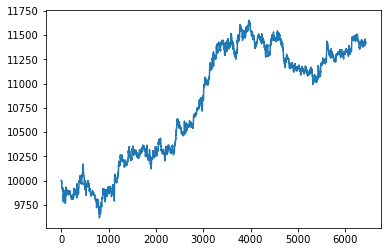

In [8]:
a=[]
for i in range(len(portfolio)):
    a.append(portfolio['total'].iloc[i])
plt.plot(a)
plt.show()